In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from functools import reduce

In [2]:
cases_by_county = 'Biobot Data/cases_by_county.csv'
cases_county = pd.read_csv(cases_by_county, parse_dates=['date'])

In [3]:
cases_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     15000 non-null  datetime64[ns]
 1   rolling_average_cases_per_100k_centered  15000 non-null  float64       
 2   region                                   15000 non-null  object        
 3   state                                    15000 non-null  object        
 4   county_fips_code                         15000 non-null  int64         
 5   county_name                              15000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 703.2+ KB


In [59]:
cases_county.county_fips_code.nunique()

30

In [4]:
cases_by_region = 'Biobot Data/cases_by_region.csv'
cases_region = pd.read_csv(cases_by_region, parse_dates=['date'])

In [5]:
cases_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     2500 non-null   datetime64[ns]
 1   rolling_average_cases_per_100k_centered  2500 non-null   float64       
 2   region                                   2500 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 58.7+ KB


In [6]:
wastewater_by_county = 'Biobot Data/wastewater_by_county.csv'
wastewater_county = pd.read_csv(wastewater_by_county, parse_dates=['sampling_week'])

In [7]:
wastewater_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   sampling_week                             1267 non-null   datetime64[ns]
 1   normalized_concentration_rolling_average  1267 non-null   float64       
 2   population                                1267 non-null   object        
 3   region                                    1267 non-null   object        
 4   state                                     1267 non-null   object        
 5   county_fips_code                          1267 non-null   int64         
 6   county_name                               1267 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 69.4+ KB


In [60]:
wastewater_county.county_fips_code.nunique()

30

In [8]:
wastewater_by_region = 'Biobot Data/wastewater_by_region.csv'
wastewater_region = pd.read_csv(wastewater_by_region, parse_dates=['sampling_week'])

In [9]:
wastewater_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   sampling_week                             315 non-null    datetime64[ns]
 1   normalized_concentration_rolling_average  315 non-null    float64       
 2   population                                315 non-null    object        
 3   region                                    315 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.0+ KB


In [10]:
wastewater_county['date'] = wastewater_county['sampling_week']

In [ ]:
cases_data_frames = [cases_county, cases_region]
wastewater_data_frames = [wastewater_county, wastewater_region]

In [230]:
county_merged = cases_county.reset_index().merge(wastewater_county)

In [231]:
county_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1250
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   index                                     1251 non-null   int64         
 1   date                                      1251 non-null   datetime64[ns]
 2   rolling_average_cases_per_100k_centered   1251 non-null   float64       
 3   region                                    1251 non-null   object        
 4   state                                     1251 non-null   object        
 5   county_fips_code                          1251 non-null   int64         
 6   county_name                               1251 non-null   object        
 7   sampling_week                             1251 non-null   datetime64[ns]
 8   normalized_concentration_rolling_average  1251 non-null   float64       
 9   population                    

In [232]:
county_merged.columns

Index(['index', 'date', 'rolling_average_cases_per_100k_centered', 'region',
       'state', 'county_fips_code', 'county_name', 'sampling_week',
       'normalized_concentration_rolling_average', 'population'],
      dtype='object')

<AxesSubplot:xlabel='date', ylabel='normalized_concentration_rolling_average'>

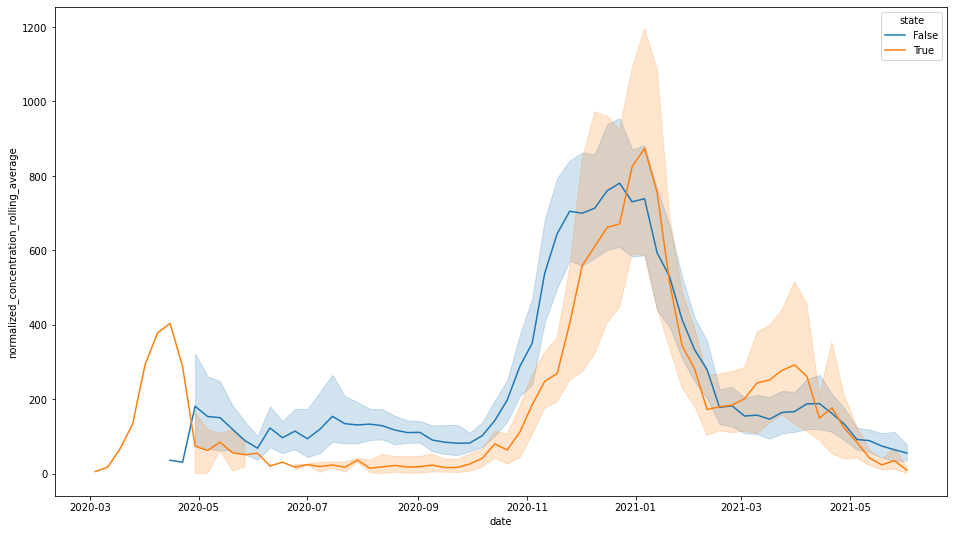

In [309]:
plt.figure(figsize=(16,9))
sns.lineplot(x='date', y='normalized_concentration_rolling_average', 
            data=county_merged, hue=(county_merged.state == 'MA'))

In [298]:
county_merged.head(10)

,date,rolling_average_cases_per_100k_centered,region,state,county_fips_code,county_name,normalized_concentration_rolling_average,population
sampling_week,,,,,,,,
2020-05-13,2020-05-13,12.358572,Midwest,IN,18089,Lake,124.219023,200000-500000
2020-05-20,2020-05-20,11.152140,Midwest,IN,18089,Lake,86.285771,200000-500000
2020-05-27,2020-05-27,10.210534,Midwest,IN,18089,Lake,66.981292,200000-500000
2020-06-03,2020-06-03,11.093289,Midwest,IN,18089,Lake,21.675411,200000-500000
2020-06-17,2020-06-17,7.268017,Midwest,IN,18089,Lake,43.899843,200000-500000
2020-06-24,2020-06-24,10.004558,Midwest,IN,18089,Lake,65.623157,100000-200000
2020-07-08,2020-07-08,14.241783,Midwest,IN,18089,Lake,145.255103,200000-500000
2020-07-15,2020-07-15,14.565459,Midwest,IN,18089,Lake,160.476485,200000-500000
2020-07-22,2020-07-22,14.918561,Midwest,IN,18089,Lake,172.795243,200000-500000


In [233]:
county_merged['sampling_week'].isnull().sum()

0

In [234]:
county_merged['sampling_week'].nunique()

66

In [235]:
county_merged['sampling_week'].dtype

dtype('<M8[ns]')

In [236]:
county_merged['sampling_week'].shape

(1251,)

In [237]:
county_merged['date'].isnull().sum()

0

In [238]:
for x in county_merged.columns:
    print(x, county_merged[x].isnull().sum())

index 0
date 0
rolling_average_cases_per_100k_centered 0
region 0
state 0
county_fips_code 0
county_name 0
sampling_week 0
normalized_concentration_rolling_average 0
population 0


In [239]:
def blank_check(df):
    ''' A method to check my column cells from a pandas DataFrame for whitespace blanks.'''
    return dict(zip(df.columns, [(df[x] == '').sum() for x in df.columns]))

In [240]:
for col, blanks in blank_check(county_merged).items():
    print(col, blanks)

index 0
date 0
rolling_average_cases_per_100k_centered 0
region 0
state 0
county_fips_code 0
county_name 0
sampling_week 0
normalized_concentration_rolling_average 0
population 0


In [241]:
county_merged[county_merged['state']=='MA']

,index,date,rolling_average_cases_per_100k_centered,region,state,county_fips_code,county_name,sampling_week,normalized_concentration_rolling_average,population
146,2164,2020-07-08,1.029032,Northeast,MA,25003,Berkshire,2020-07-08,23.265067,50000-100000
147,2171,2020-07-15,1.257706,Northeast,MA,25003,Berkshire,2020-07-15,15.510045,50000-100000
148,2192,2020-08-05,1.486380,Northeast,MA,25003,Berkshire,2020-08-05,5.836566,50000-100000
149,2199,2020-08-12,0.114337,Northeast,MA,25003,Berkshire,2020-08-12,0.000000,50000-100000
150,2213,2020-08-26,3.087097,Northeast,MA,25003,Berkshire,2020-08-26,0.000000,50000-100000
...,...,...,...,...,...,...,...,...,...,...
702,8465,2021-05-05,11.763976,Northeast,MA,25025,Suffolk,2021-05-05,102.059487,2000000-5000000
703,8472,2021-05-12,6.841587,Northeast,MA,25025,Suffolk,2021-05-12,69.625957,2000000-5000000
704,8479,2021-05-19,8.245446,Northeast,MA,25025,Suffolk,2021-05-19,50.628972,2000000-5000000
705,8486,2021-05-26,4.193804,Northeast,MA,25025,Suffolk,2021-05-26,38.508182,2000000-5000000


In [249]:
Mass_df = pd.DataFrame(county_merged[county_merged['state']=='MA'])
Mass_df.shape

(253, 8)

<AxesSubplot:xlabel='date', ylabel='normalized_concentration_rolling_average'>

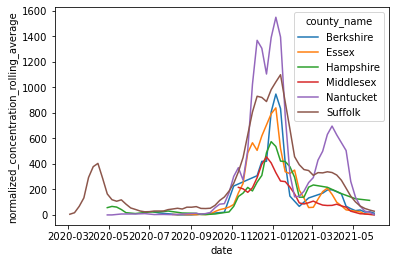

<Figure size 1512x648 with 0 Axes>

In [284]:
fig, axs = plt.subplots()
plt.figure(figsize=(21,9))
sns.lineplot(x='date', y='normalized_concentration_rolling_average', 
            data=Mass_df, hue=Mass_df.county_name, ax=axs)

In [251]:
Mass_df.county_name.nunique()

6

TypeError: no numeric data to plot

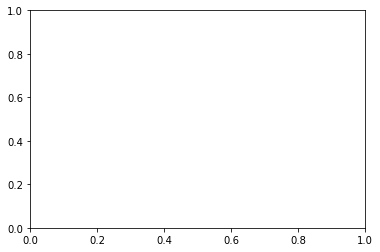

In [260]:
fig, ax = plt.subplots()
Mass_df.county_name.plot(y='normalized_concentration_rolling_average')

In [242]:
county_merged.shape

(1251, 10)

In [244]:
county_merged.set_index('sampling_week', drop=True, inplace=True)

In [245]:
county_merged.shape

(1251, 9)

In [246]:
county_merged.drop(columns='index', inplace=True)

In [247]:
county_merged.shape

(1251, 8)

<AxesSubplot:xlabel='date'>

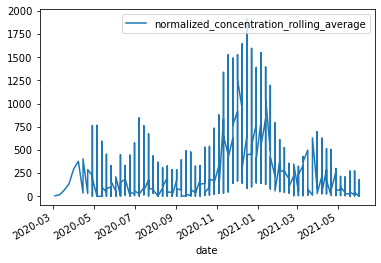

In [248]:
county_merged.plot(x='date', y='normalized_concentration_rolling_average')

In [ ]:
county_merged['date'].nunique()

In [19]:
test_df = county_merged.set_index('date', drop=True)

In [25]:
test_df.drop(columns='index', inplace=True)

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37530 entries, 2020-03-04 to 2021-06-02
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   rolling_average_cases_per_100k_centered   37530 non-null  float64       
 1   region_x                                  37530 non-null  object        
 2   state_x                                   37530 non-null  object        
 3   county_fips_code_x                        37530 non-null  int64         
 4   county_name_x                             37530 non-null  object        
 5   sampling_week                             37530 non-null  datetime64[ns]
 6   normalized_concentration_rolling_average  37530 non-null  float64       
 7   population                                37530 non-null  object        
 8   region_y                                  37530 non-null  object        
 9   state_y    

In [ ]:
test_df[['state_x','state_y']].shape

In [28]:
state_filter = test_df.loc[~(test_df['state_x'] == test_df['state_y'])]

In [33]:
state_filter[['state_x', 'state_y']]

,state_x,state_y
date,,
2020-03-04,IN,MA
2020-03-04,IL,MA
2020-03-04,MN,MA
2020-03-04,IN,MA
2020-03-04,PA,MA
...,...,...
2021-06-02,CA,FL
2021-06-02,CA,TN
2021-06-02,CA,VA


In [64]:
county_merged_by_fips = cases_county.reset_index().merge(wastewater_county, 
                                                         on='county_fips_code',
                                                         how='left').fillna(np.nan)

In [66]:
county_merged_by_fips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633500 entries, 0 to 633499
Data columns (total 14 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   index                                     633500 non-null  int64         
 1   date_x                                    633500 non-null  datetime64[ns]
 2   rolling_average_cases_per_100k_centered   633500 non-null  float64       
 3   region_x                                  633500 non-null  object        
 4   state_x                                   633500 non-null  object        
 5   county_fips_code                          633500 non-null  int64         
 6   county_name_x                             633500 non-null  object        
 7   sampling_week                             633500 non-null  datetime64[ns]
 8   normalized_concentration_rolling_average  633500 non-null  float64       
 9   population     

In [67]:
15000*1267

19005000

In [68]:
county_merged_by_fips.head(1)

,index,date_x,rolling_average_cases_per_100k_centered,region_x,state_x,county_fips_code,county_name_x,sampling_week,normalized_concentration_rolling_average,population,region_y,state_y,county_name_y,date_y
0,0,2020-01-26,0.0,Midwest,IN,18089,Lake,2020-05-13,124.219023,200000-500000,Midwest,IN,Lake,2020-05-13


In [69]:
state_filter_by_fips = county_merged_by_fips.loc[
    ~(county_merged_by_fips['state_x'] == county_merged_by_fips['state_y'])]

In [71]:
state_filter_by_fips.shape

(0, 14)

In [74]:
county_merged_by_fips.value_counts('state_y')

state_y
MA    128500
PA     92000
CA     70500
IN     40500
TN     32500
FL     29500
NV     29000
KY     27500
CT     27000
OR     24500
VA     24500
CO     24000
NY     19000
DE     18000
IL     17500
MN     15000
NJ     14000
dtype: int64

In [91]:
Mass_cases = pd.DataFrame(cases_county.loc[(cases_county.state == 'MA')])

In [92]:
Mass_wastewater = pd.DataFrame(wastewater_county.loc[(wastewater_county.state == 'MA')])

In [93]:
Mass_cases.shape

(3000, 6)

In [94]:
Mass_wastewater.shape

(257, 8)

In [95]:
Mass_wastewater['date'] = Mass_wastewater['sampling_week']

In [96]:
Mass_wastewater.drop(columns='sampling_week', inplace=True)

In [98]:
Mass_cases.columns

Index(['date', 'rolling_average_cases_per_100k_centered', 'region', 'state',
       'county_fips_code', 'county_name'],
      dtype='object')

In [99]:
Mass_wastewater.columns

Index(['normalized_concentration_rolling_average', 'population', 'region',
       'state', 'county_fips_code', 'county_name', 'date'],
      dtype='object')

In [206]:
Mass_merged_df = Mass_cases.reset_index().merge(Mass_wastewater, how='cross')

In [207]:
Mass_merged_df.shape

(771000, 14)

In [208]:
Mass_merged_df.columns

Index(['index', 'date_x', 'rolling_average_cases_per_100k_centered',
       'region_x', 'state_x', 'county_fips_code_x', 'county_name_x',
       'normalized_concentration_rolling_average', 'population', 'region_y',
       'state_y', 'county_fips_code_y', 'county_name_y', 'date_y'],
      dtype='object')

In [200]:
Mass_merged_df.isnull().sum()

index                                          0
date                                           0
rolling_average_cases_per_100k_centered        0
region                                         0
state                                          0
county_fips_code                               0
county_name                                    0
normalized_concentration_rolling_average    2747
population                                  2747
dtype: int64

In [221]:
x = Mass_merged_df.copy()
county_slice = x.loc[~(x.county_name_x == x.county_name_y)]

In [222]:
len(county_slice)

642500

In [229]:
county_slice.head(10)

,index,date_x,rolling_average_cases_per_100k_centered,region_x,state_x,county_fips_code_x,county_name_x,normalized_concentration_rolling_average,population,region_y,state_y,county_fips_code_y,county_name_y,date_y
30,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,3.445926,20000-50000,Northeast,MA,25009,Essex,2020-08-05
31,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,2.297284,20000-50000,Northeast,MA,25009,Essex,2020-08-12
32,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,4.016684,20000-50000,Northeast,MA,25009,Essex,2020-08-19
33,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,1.719400,20000-50000,Northeast,MA,25009,Essex,2020-08-26
34,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,3.112600,20000-50000,Northeast,MA,25009,Essex,2020-09-02
35,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,1.393199,20000-50000,Northeast,MA,25009,Essex,2020-09-09
36,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,4.165386,20000-50000,Northeast,MA,25009,Essex,2020-09-16
37,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,2.772187,20000-50000,Northeast,MA,25009,Essex,2020-09-23
38,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,5.888057,20000-50000,Northeast,MA,25009,Essex,2020-09-30
39,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,26.521146,20000-50000,Northeast,MA,25009,Essex,2020-10-07


In [178]:
Mass_merged_df.county_fips_code.nunique()

6

In [179]:
Mass_merged_df.county_name.nunique()

6

In [168]:
kept_features = ['date', 'rolling_average_cases_per_100k_centered', 'region_x', 'state_x',
                'county_fips_code_x', 'county_name_x']

In [169]:
Mass_county_filter = Mass_merged_df.loc[~(Mass_merged_df['county_name_x'] == Mass_merged_df['county_name_y'])]

KeyError: 'county_name_x'

In [163]:
Mass_county_filter.shape

(1265, 13)

In [164]:
Mass_county_filter.tail()

,index,date,rolling_average_cases_per_100k_centered,region_x,state_x,county_fips_code_x,county_name_x,normalized_concentration_rolling_average,population,region_y,state_y,county_fips_code_y,county_name_y
1512,6993,2021-06-02,1.253243,Northeast,MA,25019,Nantucket,2.898029e+01,2000000-5000000,Northeast,MA,25025,Suffolk
1513,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,1.370887e+01,50000-100000,Northeast,MA,25003,Berkshire
1514,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,6.631732e-14,20000-50000,Northeast,MA,25009,Essex
1515,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,2.343160e+00,100000-200000,Northeast,MA,25017,Middlesex
1516,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,9.712605e-01,10000-20000,Northeast,MA,25019,Nantucket
